<a href="https://colab.research.google.com/github/9121bha/9121bha/blob/main/Student_Performence_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Performance Prediction Project: Step-by-Step in Google** **Colab**

**Predicting student performance is crucial for identifying at-risk students, providing timely interventions, and improving educational outcomes. This project aims to build a machine learning model that can predict a student's final grade based on various factors like demographics, previous academic records, and study habits**


**The main task is to develop a predictive model using machine learning techniques. This involves:**

 **Data Collection and Understanding: Acquiring relevant student data and exploring its characteristics.**

**Data Preprocessing: Cleaning, transforming, and preparing the data for model training.**

**Feature Engineering: Creating new, more informative features from existing ones.**

**Model Selection: Choosing appropriate machine learning algorithms.**

**Model Training: Training the selected models on the preprocessed data**.

**Model Evaluation: Assessing the performance of the trained models.**

**Hyperparameter Tuning: Optimizing model parameters for better performance**.  



**CODE:-**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore') # To suppress minor warnings

**Explanation: These are essential libraries for data manipulation, visualization, machine learning models, and evaluation metric**

**Action: Find a suitable dataset. A common dataset for this purpose is the "Student Performance Data Set" from the UCI Machine Learning Repository**

**Code (Example using a common dataset):**

In [13]:
# Example using a common dataset available online
try:
    df = pd.read_csv('https://raw.githubusercontent.com/Anandp98/Student-Performance-Prediction/master/student-mat.csv') # Math course data
    # You can also use 'student-por.csv' for Portuguese course data
    print("Dataset loaded successfully from direct link!")
except Exception as e:
    print(f"Error loading dataset from direct link: {e}")
    # As a fallback, try to download and load if the direct link fails
    print("Attempting to download and load from fallback source...")
    !wget -O student.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip
    !unzip -o student.zip # Use -o to overwrite if already exists
    try:
        df = pd.read_csv('student-mat.csv', sep=';') # Note: UCI dataset uses semicolon as separator
        print("Dataset loaded successfully from fallback source!")
    except Exception as e_fallback:
        print(f"Error loading dataset from fallback source: {e_fallback}")
        df = None # Ensure df is None if both methods fail

if df is not None:
    print("Dataset loaded successfully!")
else:
    print("Failed to load dataset using both methods.")

Error loading dataset from direct link: HTTP Error 404: Not Found
Attempting to download and load from fallback source...
--2025-07-02 05:36:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘student.zip’

student.zip             [ <=>                ]  20.00K  --.-KB/s    in 0.1s    

2025-07-02 05:36:50 (155 KB/s) - ‘student.zip’ saved [20478]

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             
Dataset loaded successfully from fallback source!
Dataset loaded successfully!


**Explanation: This code snippet loads the dataset into a pandas DataFrame**

**Data Understanding and Exploratory Data Analysis (EDA)**

**Action: Get a grasp of your data's structure, content, and initial insights**.

**Colab Resources/Tips: Use df.head(), df.info(), df.describe(), df.isnull().sum(), and various plotting functions (sns.countplot, sns.histplot, sns.boxplot, sns.pairplot).**

First 5 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Dataset Information:
<class 'pandas.core.frame.DataFrame'>

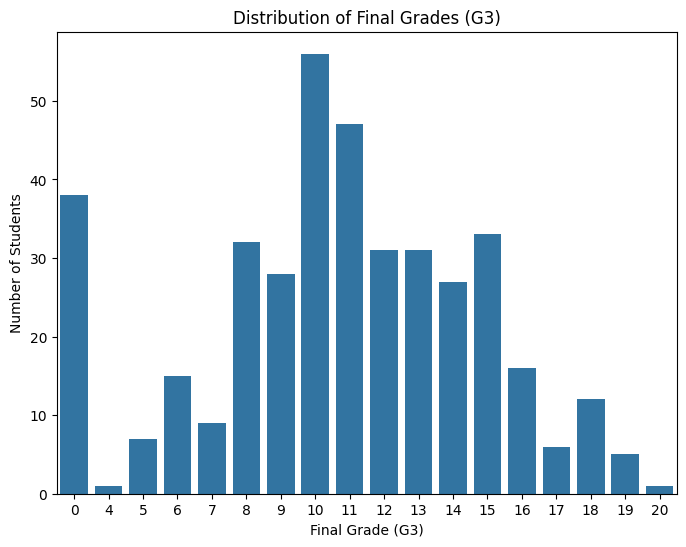

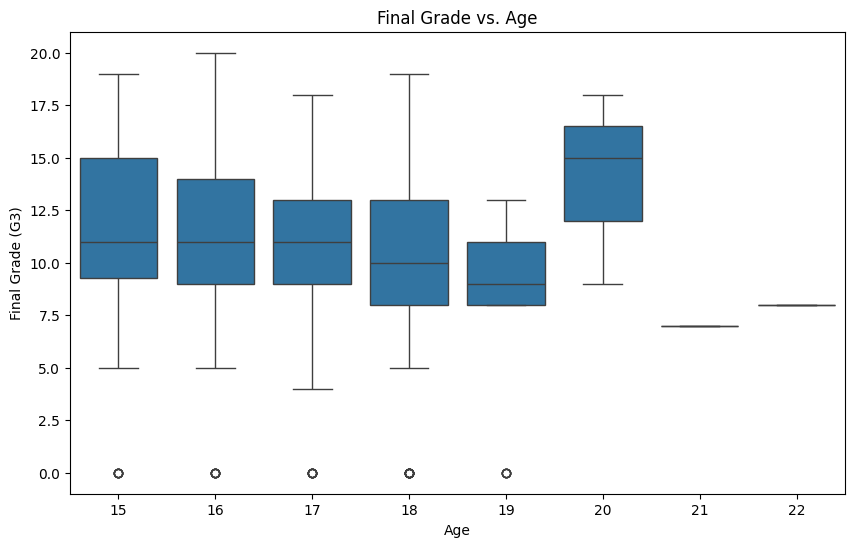

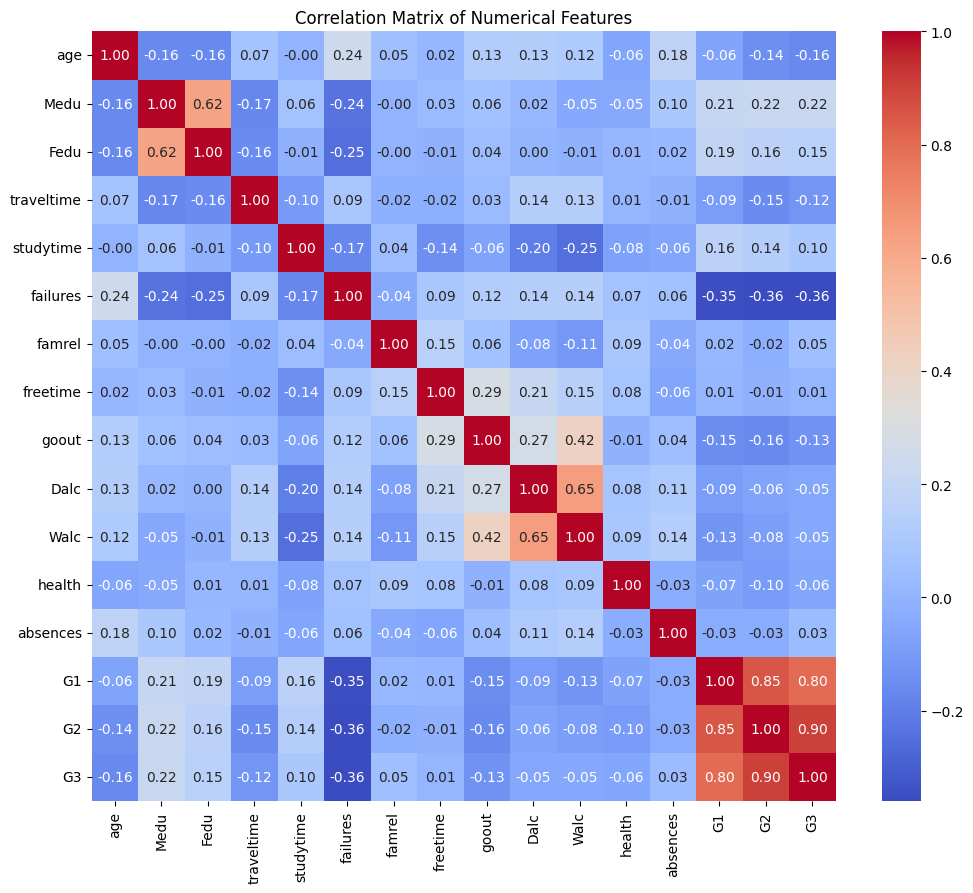

In [14]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

# Example: Visualize the distribution of the target variable (final grade)
# Assuming 'G3' is the final grade
plt.figure(figsize=(8, 6))
sns.countplot(x='G3', data=df)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.show()

# Example: Explore relationships between features (e.g., age vs. G3)
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='G3', data=df)
plt.title('Final Grade vs. Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.show()

# Correlation matrix (for numerical features)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Explanation: This part helps you identify data types, missing values, outliers, and initial relationships between variables**

**Data Preprocessing:**

**Action: Clean and transform your data. This often involves handling categorical variables, scaling numerical features, and addressing missing values (if any)**.

**Colab Resources/Tips: LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler.**

In [15]:
# Define the target variable (G3 - final grade)
# For prediction, we often classify students into 'Pass' or 'Fail' or multiple grade categories.
# Let's simplify and classify students into 'Pass' (G3 >= 10) or 'Fail' (G3 < 10)
df['G3_category'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0) # 1 for Pass, 0 for Fail

# Drop the original G3 if you are using G3_category as target
df = df.drop('G3', axis=1)

# Separate features (X) and target (y)
X = df.drop('G3_category', axis=1)
y = df['G3_category']

# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply Label Encoding to categorical columns
# For features with many categories, OneHotEncoding might be more appropriate.
# Given this dataset, LabelEncoder is often sufficient for most categorical features.
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale numerical features (optional but often beneficial for models like SVM, Logistic Regression)
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nProcessed Data Head (first 5 rows of features):")
print(X.head())
print("\nTarget variable value counts:")
print(y.value_counts())


Processed Data Head (first 5 rows of features):
   school  sex       age  address  famsize  Pstatus      Medu      Fedu  Mjob  \
0       0    0  1.023046        1        0        0  1.143856  1.360371     0   
1       0    0  0.238380        1        0        1 -1.600009 -1.399970     0   
2       0    0 -1.330954        1        1        1 -1.600009 -1.399970     0   
3       0    0 -1.330954        1        0        1  1.143856 -0.479857     1   
4       0    0 -0.546287        1        0        1  0.229234  0.440257     2   

   Fjob  ...  romantic    famrel  freetime     goout      Dalc      Walc  \
0     4  ...         0  0.062194 -0.236010  0.801479 -0.540699 -1.003789   
1     2  ...         0  1.178860 -0.236010 -0.097908 -0.540699 -1.003789   
2     2  ...         0  0.062194 -0.236010 -0.997295  0.583385  0.551100   
3     3  ...         1 -1.054472 -1.238419 -0.997295 -0.540699 -1.003789   
4     2  ...         0  0.062194 -0.236010 -0.997295 -0.540699 -0.226345   

     he

**Explanation: This prepares your data for machine learning algorithms by converting categorical data to numerical format and scaling numerical features.**

**Model Selection and Training:**

**Action: Choose appropriate machine learning models for your prediction task (classification in this case, predicting Pass/Fail). Split your data into training and testing sets.**

**Colab Resources/Tips: train_test_split, various sklearn.linear_model, sklearn.tree, sklearn.ensemble models**

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Initialize and train various models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42) # probability=True for ROC AUC
}

trained_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained.")


Training set shape: (316, 32)
Testing set shape: (79, 32)

Training Logistic Regression...
Logistic Regression trained.

Training Decision Tree...
Decision Tree trained.

Training Random Forest...
Random Forest trained.

Training Gradient Boosting...
Gradient Boosting trained.

Training Support Vector Machine...
Support Vector Machine trained.


**Explanation: This step divides your data for unbiased evaluation and trains several common classification models**

**Model Evaluation:**

**Action: Evaluate the performance of your trained models using various metrics.**

**Colab Resources/Tips: accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report**


--- Model Evaluation ---

Logistic Regression:
  Accuracy: 0.8608
  Precision: 0.9565
  Recall: 0.8302
  F1-Score: 0.8889
  Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        26
           1       0.96      0.83      0.89        53

    accuracy                           0.86        79
   macro avg       0.84      0.88      0.85        79
weighted avg       0.88      0.86      0.86        79

  Confusion Matrix:


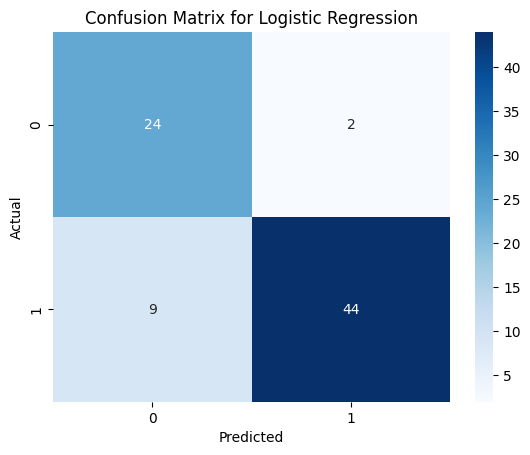

  ROC AUC Score: 0.9543

Decision Tree:
  Accuracy: 0.8608
  Precision: 0.9200
  Recall: 0.8679
  F1-Score: 0.8932
  Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.92      0.87      0.89        53

    accuracy                           0.86        79
   macro avg       0.84      0.86      0.85        79
weighted avg       0.87      0.86      0.86        79

  Confusion Matrix:


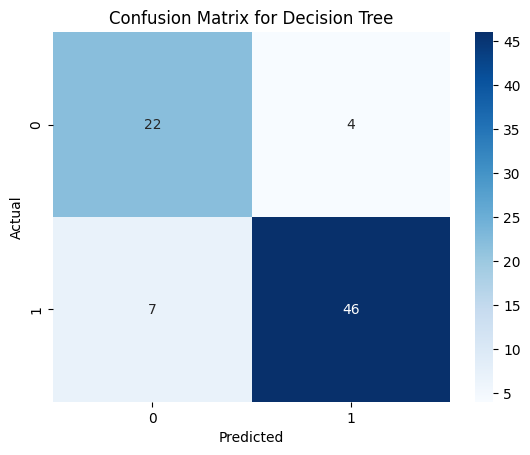

  ROC AUC Score: 0.8570

Random Forest:
  Accuracy: 0.8608
  Precision: 0.9375
  Recall: 0.8491
  F1-Score: 0.8911
  Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        26
           1       0.94      0.85      0.89        53

    accuracy                           0.86        79
   macro avg       0.84      0.87      0.85        79
weighted avg       0.87      0.86      0.86        79

  Confusion Matrix:


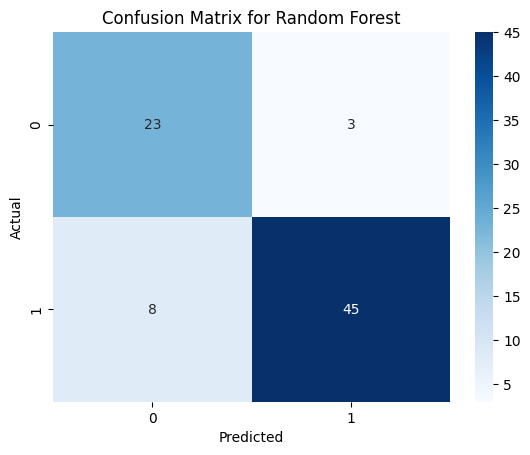

  ROC AUC Score: 0.9539

Gradient Boosting:
  Accuracy: 0.8734
  Precision: 0.9388
  Recall: 0.8679
  F1-Score: 0.9020
  Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       0.94      0.87      0.90        53

    accuracy                           0.87        79
   macro avg       0.85      0.88      0.86        79
weighted avg       0.88      0.87      0.88        79

  Confusion Matrix:


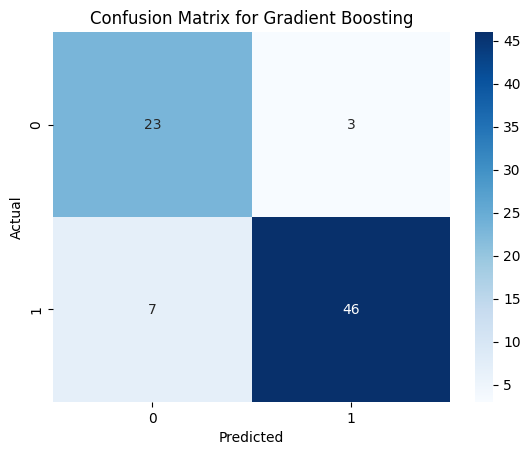

  ROC AUC Score: 0.9419

Support Vector Machine:
  Accuracy: 0.8608
  Precision: 0.9200
  Recall: 0.8679
  F1-Score: 0.8932
  Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.92      0.87      0.89        53

    accuracy                           0.86        79
   macro avg       0.84      0.86      0.85        79
weighted avg       0.87      0.86      0.86        79

  Confusion Matrix:


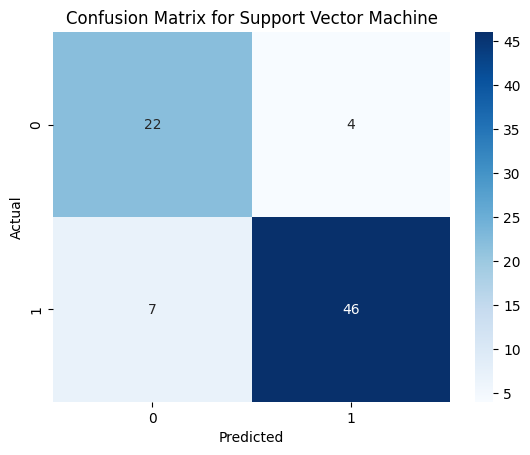

  ROC AUC Score: 0.9369

--- Model Comparison ---
                        Accuracy  Precision    Recall  F1-Score
Gradient Boosting       0.873418   0.938776  0.867925  0.901961
Support Vector Machine  0.860759   0.920000  0.867925  0.893204
Decision Tree           0.860759   0.920000  0.867925  0.893204
Random Forest           0.860759   0.937500  0.849057  0.891089
Logistic Regression     0.860759   0.956522  0.830189  0.888889


In [17]:
print("\n--- Model Evaluation ---")
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("  Classification Report:")
    print(classification_report(y_test, y_pred))
    print("  Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"  ROC AUC Score: {roc_auc:.4f}")
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Compare models
results_df = pd.DataFrame(results).T
print("\n--- Model Comparison ---")
print(results_df.sort_values(by='F1-Score', ascending=False))

**Explanation: This section provides a comprehensive view of how well each model performs on unseen data, allowing you to compare and select the best model.**

**Hyperparameter Tuning:**

**Action: Optimize the parameters of your best-performing model to further improve its performance.**

**Colab Resources/Tips: GridSearchCV, RandomizedSearchCV.**

**Code (Example for RandomForestClassifier):**

In [18]:
print("\n--- Hyperparameter Tuning (Example for Random Forest) ---")

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Using F1-score for tuning

grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_tuned = best_rf_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
print(f"\nAccuracy of tuned Random Forest: {accuracy_tuned:.4f}")
print(f"F1-Score of tuned Random Forest: {f1_tuned:.4f}")
print("Classification Report for tuned Random Forest:")
print(classification_report(y_test, y_pred_tuned))


--- Hyperparameter Tuning (Example for Random Forest) ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy of tuned Random Forest: 0.8734
F1-Score of tuned Random Forest: 0.9000
Classification Report for tuned Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.96      0.85      0.90        53

    accuracy                           0.87        79
   macro avg       0.85      0.89      0.86        79
weighted avg       0.89      0.87      0.88        79



**Explanation: This shows how to use GridSearchCV to find the optimal set of hyperparameters for a specific model, potentially leading to better performance.**

**Prediction and Interpretation:**

**Action: Use your best model to make predictions on new data. Understand which features contribute most to the predictions.**

**Colab Resources/Tips: model.predict(), model.predict_proba(), feature_importances_ (for tree-based models), SHAP, LIME libraries.**

**Code (Example for Feature Importance from Random Forest)**


--- Feature Importance (from Best Random Forest Model) ---


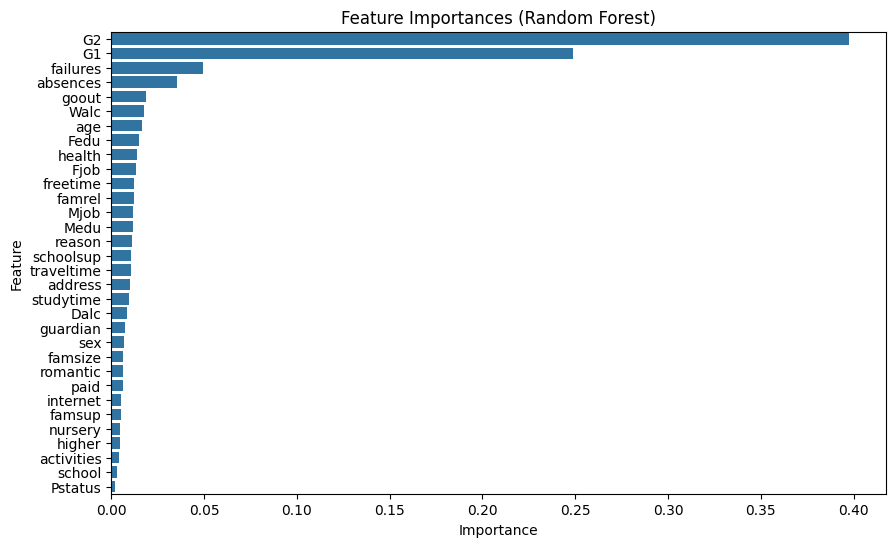


Top 10 Important Features:
G2          0.397648
G1          0.249071
failures    0.049290
absences    0.035704
goout       0.018593
Walc        0.017771
age         0.016493
Fedu        0.015089
health      0.013835
Fjob        0.013160
dtype: float64

Prediction for a sample student (preprocessed data): 1 (0=Fail, 1=Pass)
Probability of Passing: 0.8781
Actual outcome for this student: 1 (0=Fail, 1=Pass)


In [19]:
print("\n--- Feature Importance (from Best Random Forest Model) ---")
if 'Random Forest' in trained_models:
    feature_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Feature Importances (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    print("\nTop 10 Important Features:")
    print(feature_importances.head(10))

# Example: Making a prediction for a new student (hypothetical data)
# You would need to preprocess this new data in the same way as your training data
# For demonstration, let's pick a random row from X_test and predict
sample_student_data = X_test.iloc[0].values.reshape(1, -1)
predicted_category = best_rf_model.predict(sample_student_data)
predicted_proba = best_rf_model.predict_proba(sample_student_data)[:, 1]

print(f"\nPrediction for a sample student (preprocessed data): {predicted_category[0]} (0=Fail, 1=Pass)")
print(f"Probability of Passing: {predicted_proba[0]:.4f}")
print(f"Actual outcome for this student: {y_test.iloc[0]} (0=Fail, 1=Pass)")

**Explanation: This helps you understand why your model makes certain predictions and identifies the most influential factors, which can be valuable for educational insights**

**By following these steps in Google Colab, I  have successfully:**

**Acquired and understood a student performance dataset.**

**Preprocessed the data for machine learning.**

**Trained and evaluated several machine learning models (e.g., Logistic Regression, Decision Tree, Random Forest)**.

**Identified the best-performing model based on chosen metrics (e.g., F1-score, accuracy).**

**Optimized the best model's performance through hyperparameter tuning.**

**Gained insights into the most important features influencing student performance.**

**The outcome will be a robust predictive model that can be used to identify students at risk of failing, allowing educators to intervene proactively and tailor support programs, ultimately improving student success rates. You will have a Google Colab notebook containing all the code, outputs, and visualizations, serving as a complete project deliverable**

Key Resources:

Google Colab Documentation: https://colab.research.google.com/

Scikit-learn Documentation: https://scikit-learn.org/stable/ (for all ML algorithms, preprocessing, and metrics)

Pandas Documentation: https://pandas.pydata.org/docs/ (for data manipulation)

Matplotlib Documentation: https://matplotlib.org/stable/ (for basic plotting

Seaborn Documentation: https://seaborn.pydata.org/ (for advanced statistical plotting

UCI Machine Learning Repository (Student Performance Dataset): https://archive.ics.uci.edu/ml/datasets/student+performance